# Name : Khushi Rathi
# Roll NO : 05
# Computer Vision - TA2

## SIFT DETECTION

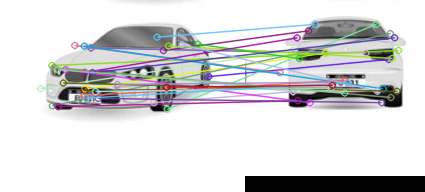

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

i1 = cv2.imread("/content/car1.png")
i2 = cv2.imread("/content/car2.png")

img1 = cv2.cvtColor(i1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(i2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

k_1, des_1 = sift.detectAndCompute(img1, None)
k_2, des_2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(des_1, des_2)
matches = sorted(matches, key=lambda x: x.distance)

img3 = cv2.drawMatches(img1, k_1, img2, k_2, matches[:50], img2, flags=2)
cv2_imshow(img3)

### Shi-Tomasi Detection

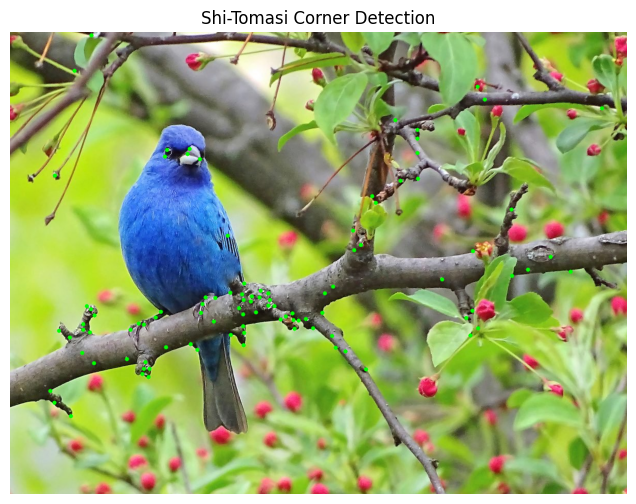

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/img8.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect corners using Shi-Tomasi
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

corners = np.int64(corners)

# Draw the corners on the original image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 4, (0, 255, 0), -1)

# Convert BGR to RGB for matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title("Shi-Tomasi Corner Detection")
plt.axis("off")
plt.show()

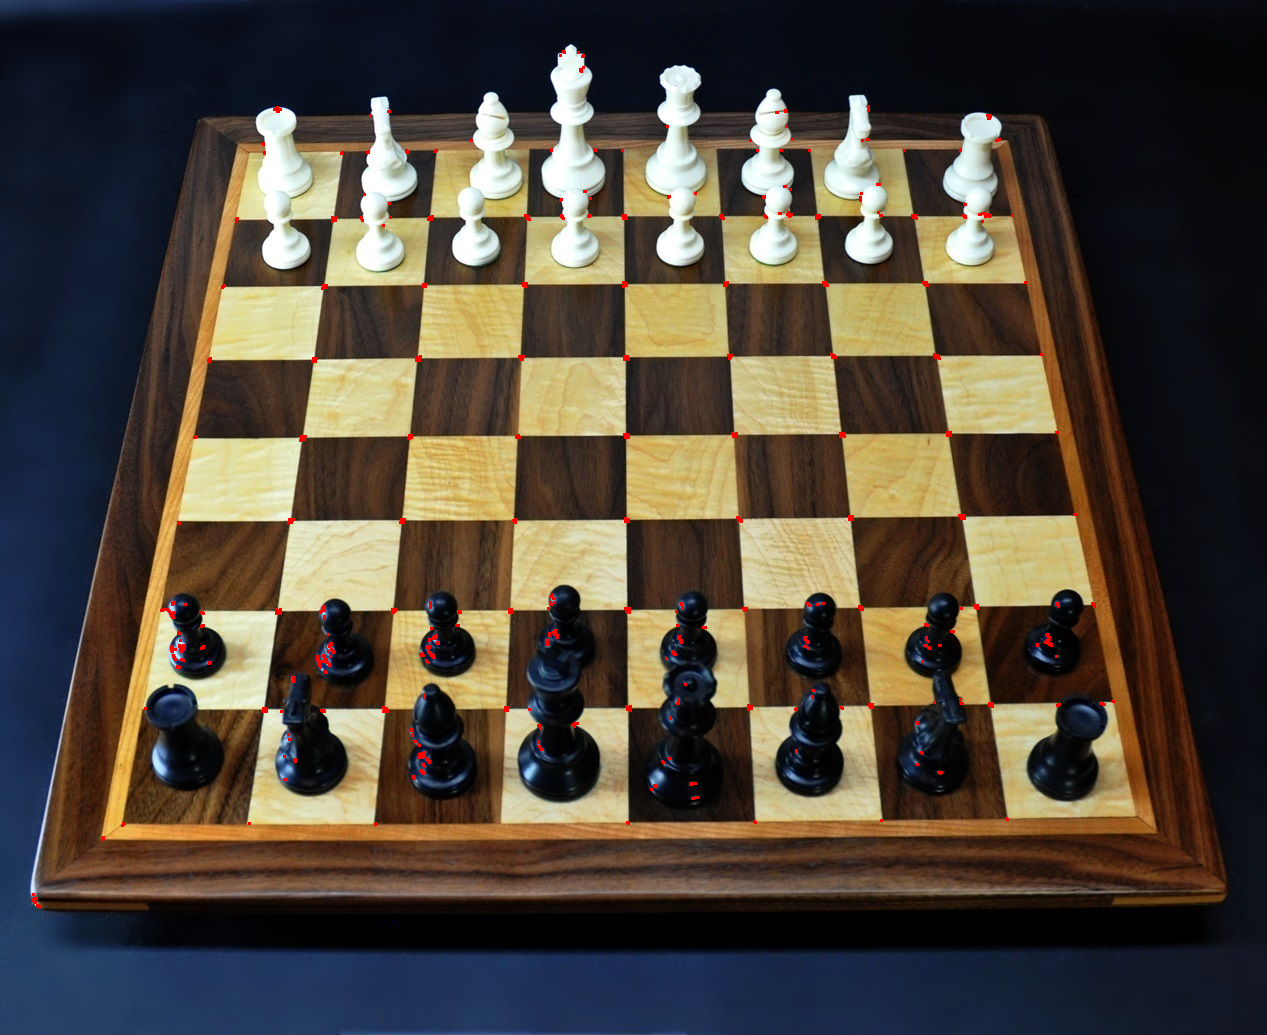

In [18]:
# Harris Corner Detection Method
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# image is loaded with imread command
image = cv2.imread('/content/img1.jpeg')

# convert the input image into grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# modify the data type setting to 32-bit floating point
operatedImage = np.float32(operatedImage)

# apply the cv2.cornerHarris method to detect the corners with appropriate values as input parameters
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.09)

# Results are marked through the dilated corners
dest = cv2.dilate(dest, None)

# Reverting back to the original image,  with optimal threshold value
image[dest > 0.01 * dest.max()]=[0, 0, 255]
# the window showing output image with corners
cv2_imshow( image)